['X287.018_2.395', 'X137.046_0.31', 'X795.335_2.768', 'X281.102_2.768', 'X674.439_3.163', 'X184.074_0.312', 'X269.088_0.433', 'X596.393_3.06', 'X367.336_3.39', 'X566.382_3.018', 'X289.014_2.395', 'X720.445_3.09', 'X760.475_3.131', 'X776.578_3.558', 'X538.351_2.803', 'X786.601_5.59', 'X328.321_3.281', 'X768.553_4.193', 'X444.238_2.77', 'X538.388_3.104', 'X798.563_3.515', 'X806.532_3.587', 'X716.485_3.266', 'X812.506_3.308', 'X798.563_3.38', 'X798.526_3.347', 'X756.435_3.368', 'X826.558_3.367', 'X584.335_2.714', 'X784.584_5.594', 'X508.376_2.995', 'X301.216_2.934', 'X534.284_2.699', 'X434.197_2.398', 'X558.284_2.634', 'X560.335_2.722', 'X746.569_5.577', 'X309.156_2.415', 'X291.146_2.39', 'X600.33_2.645', 'X812.506_3.18', 'X165.055_0.414', 'X842.552_3.284', 'X464.208_2.321', 'X333.192_2.619', 'X331.177_2.552.1', 'X251.114_2.071', 'X446.196_2.386', 'X786.563_3.567', 'X814.521_3.173', 'X814.522_3.139', 'X560.3_2.643', 'X271.104_0.42', 'X385.129_0.304', 'X590.275_2.421', 'X590.273_2.56', 'X5

C:\Users\zyliu\AppData\Local\Temp\ipykernel_10108\3084139402.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()


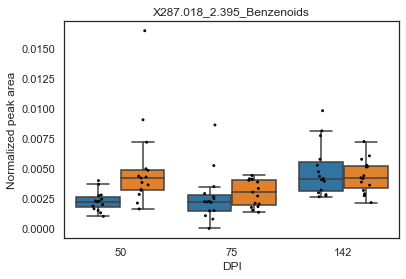

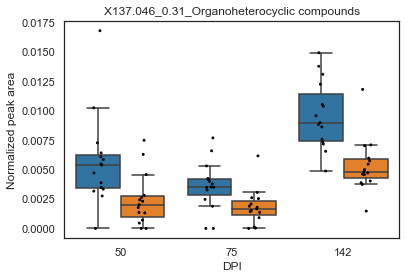

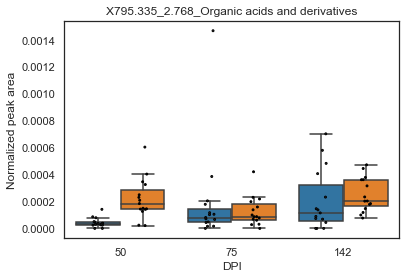

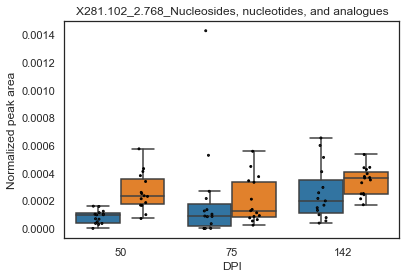

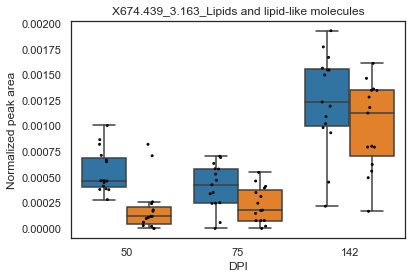

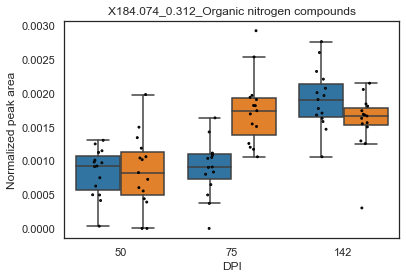

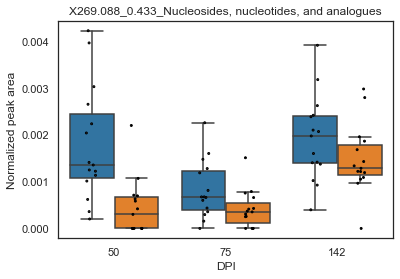

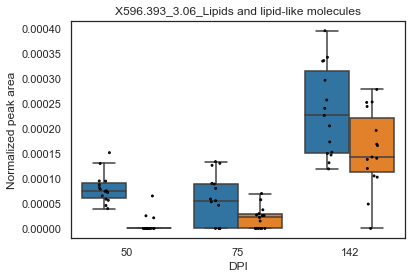

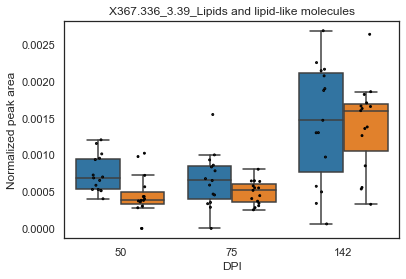

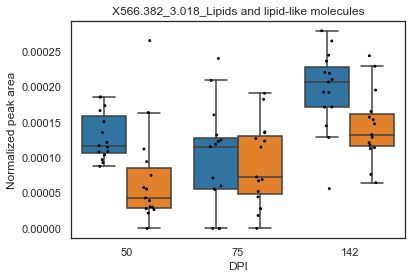

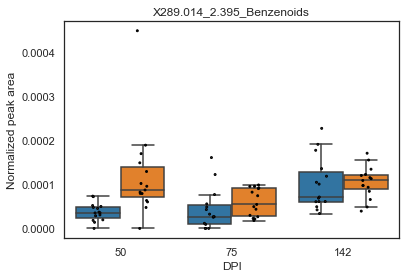

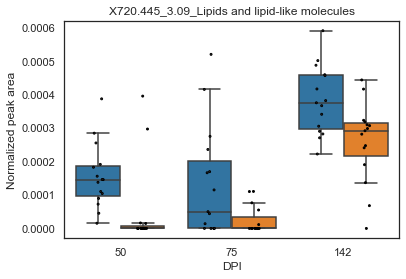

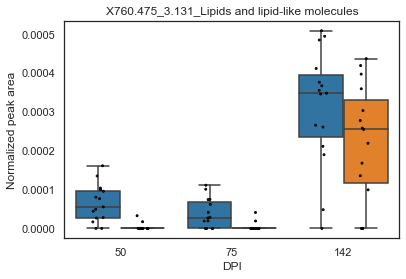

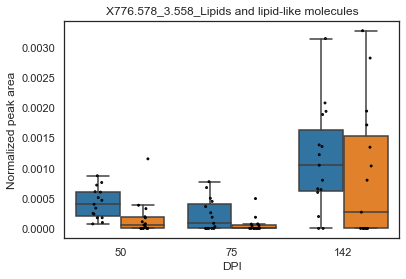

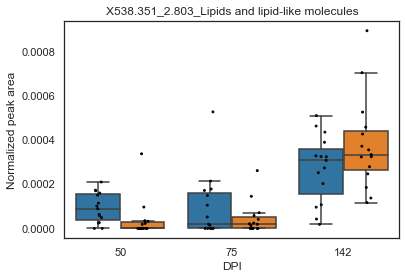

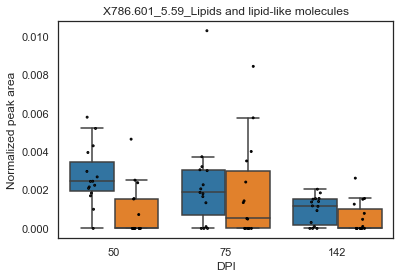

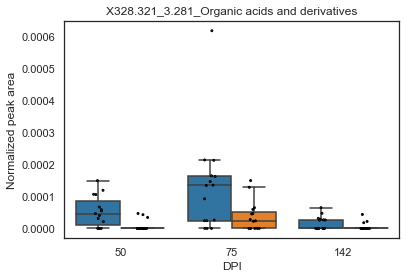

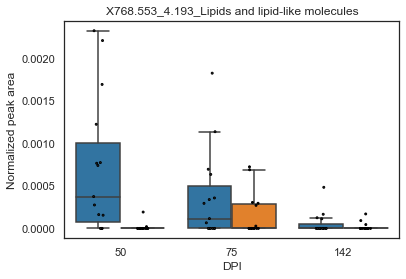

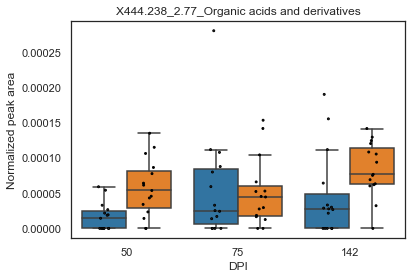

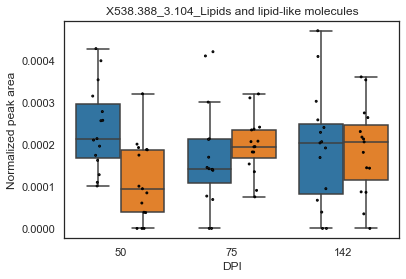

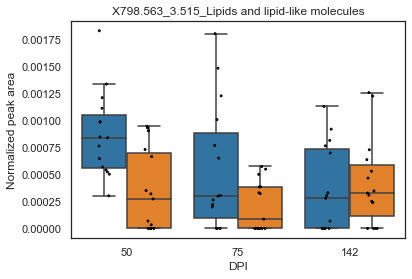

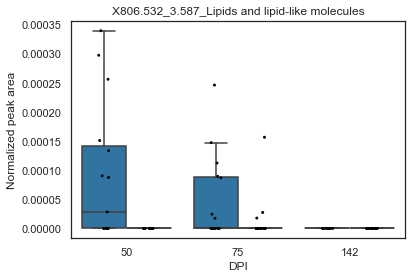

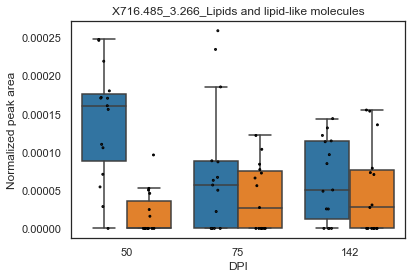

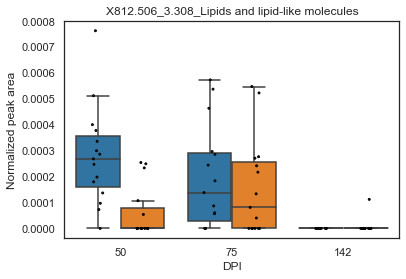

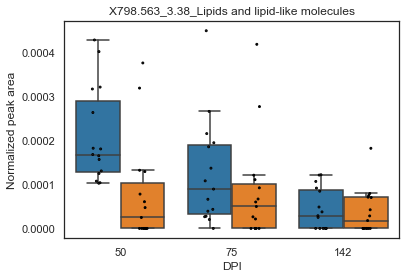

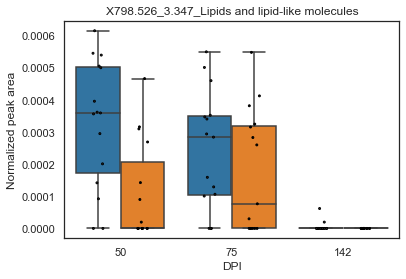

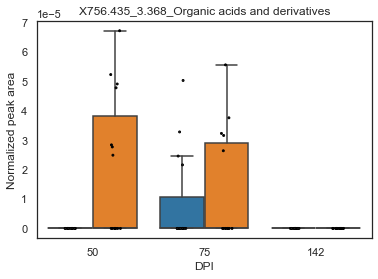

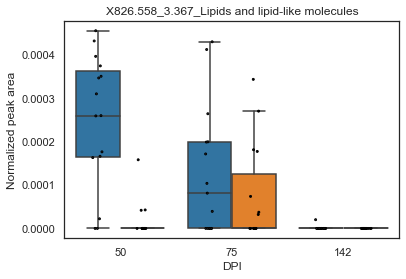

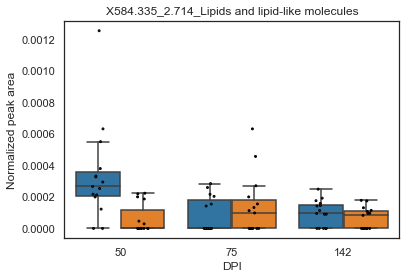

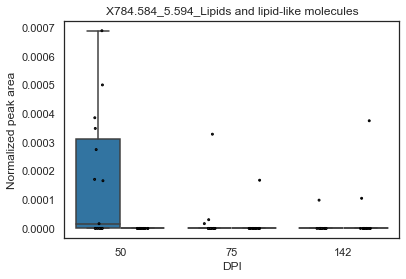

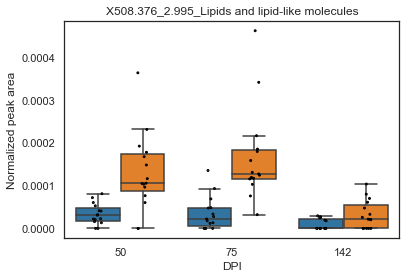

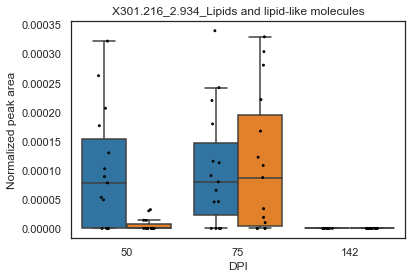

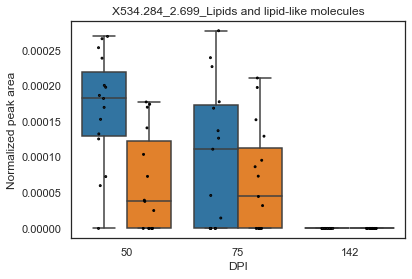

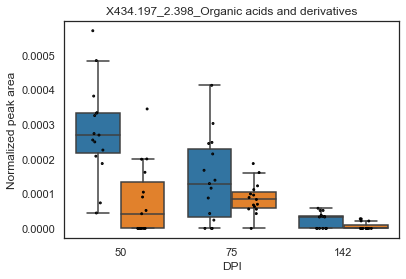

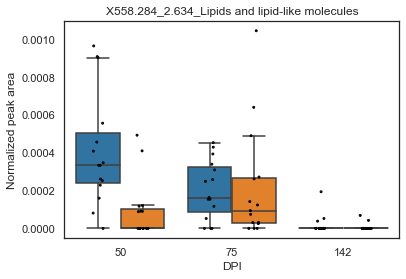

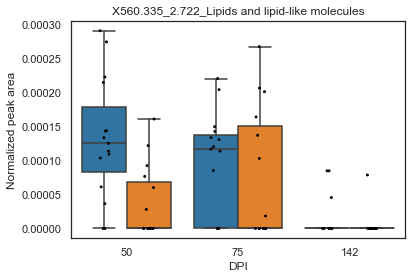

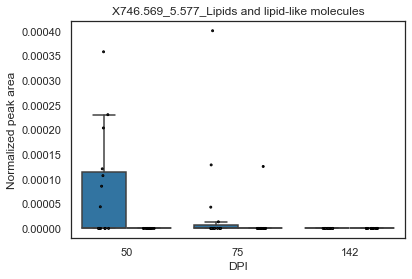

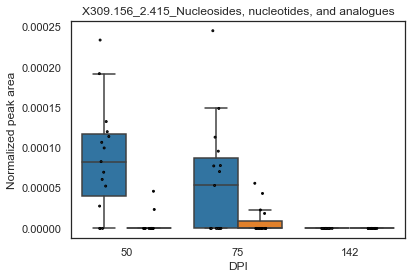

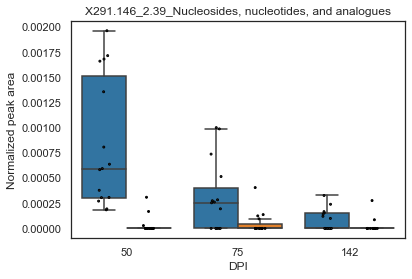

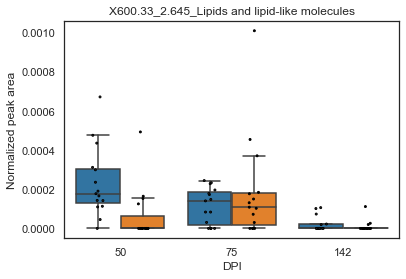

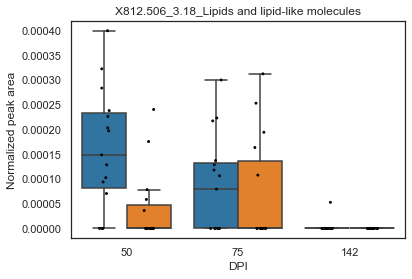

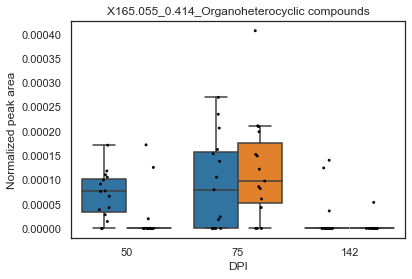

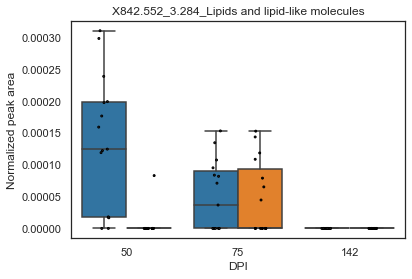

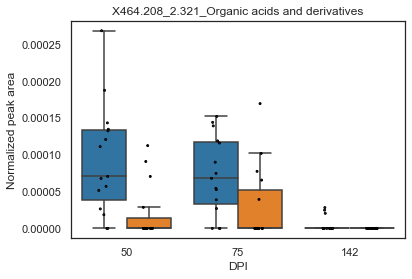

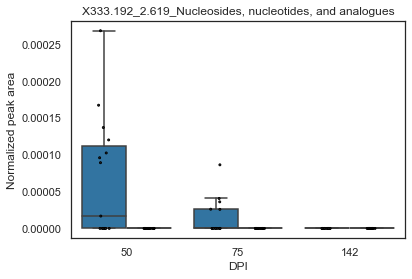

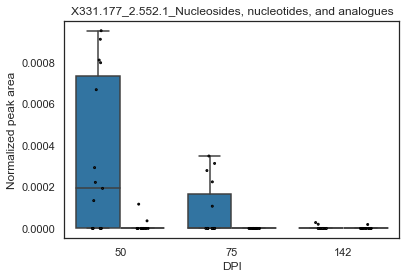

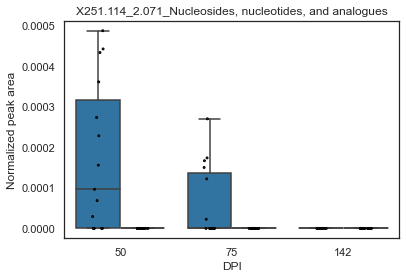

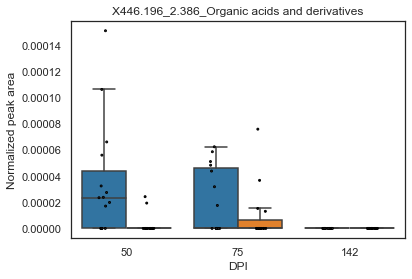

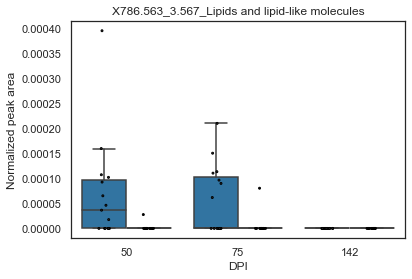

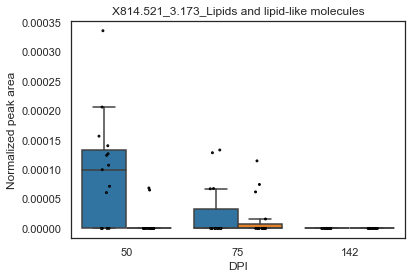

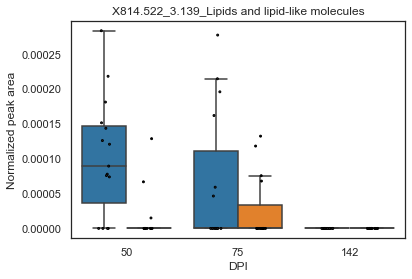

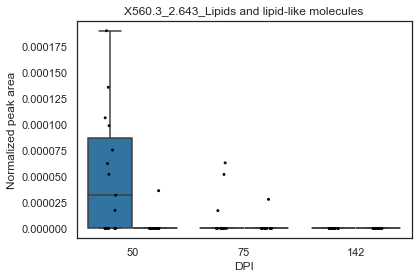

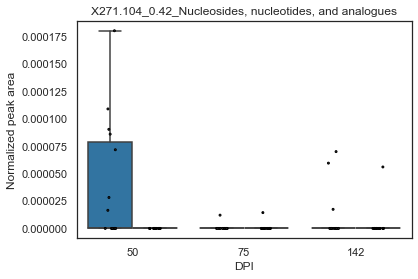

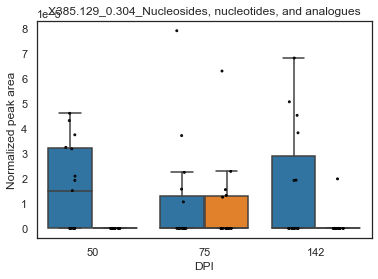

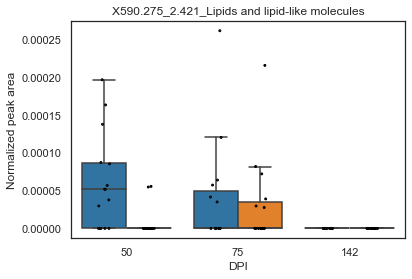

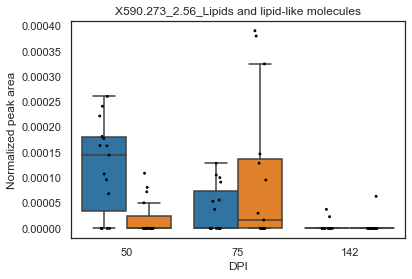

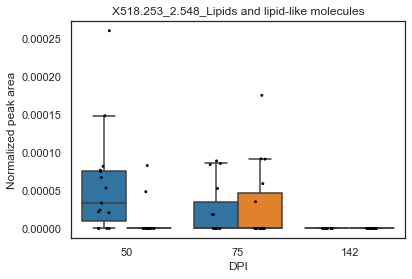

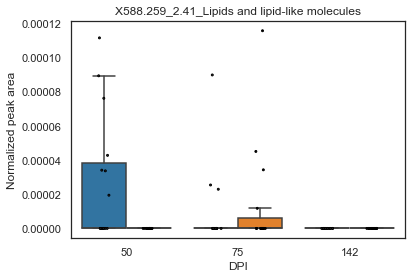

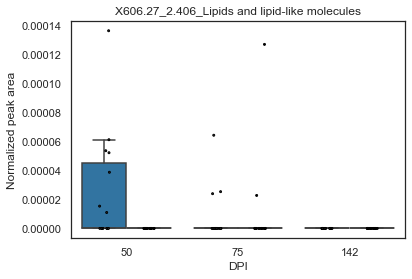

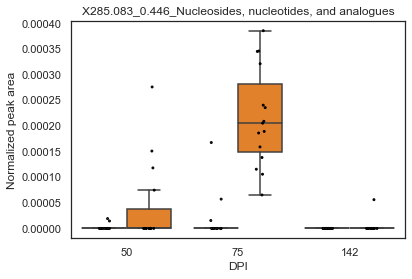

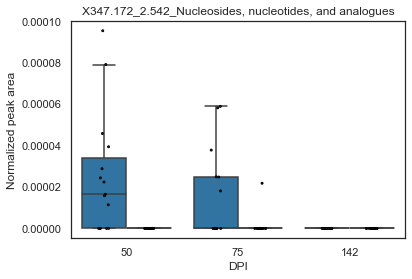

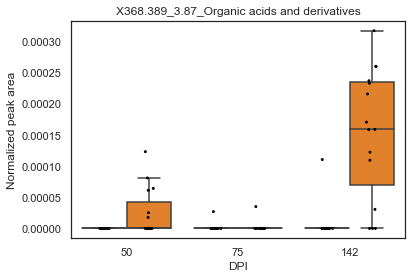

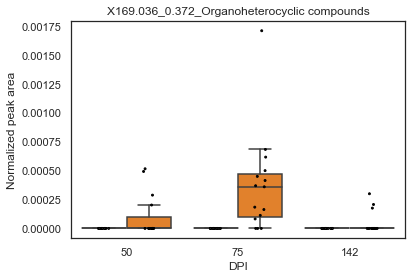

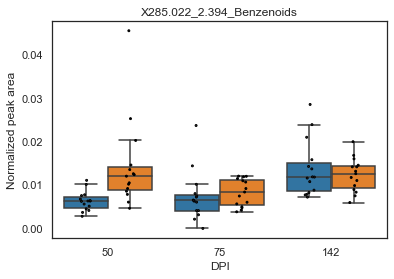

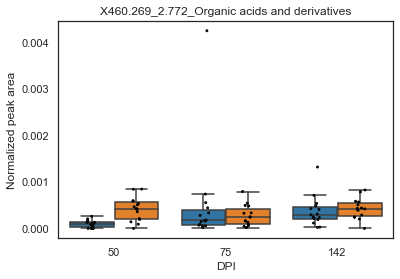

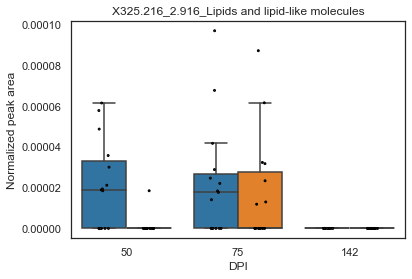

In [4]:

import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot the mass in random forest file
meta_data = pandas.read_csv('03172021-3ABE-1ABC-LA-M-F-fix-DPI.csv')
full_classes = pandas.read_csv("3ABE-1ABC-superclass-annotation-LA.csv")
classes_matches = full_classes[full_classes["classes"].isin(['Benzenoids',
                                                             'Organic acids and derivatives', 
                                                             'Lipids and lipid-like molecules',
                                                             'Organoheterocyclic compounds',
                                                             'Nucleosides, nucleotides, and analogues',
                                                             'Phenylpropanoids and polyketides', 
                                                             'Organic nitrogen compounds'])]

mass_list = classes_matches.features.to_list()
class_list = classes_matches.classes.to_list()
features_class_dic = dict(zip(mass_list,class_list))


print(mass_list)
print(class_list)
print(features_class_dic)

# change the theme tof the plot
sns.set_theme(style="white")

mass_list_number = 1
for mass in mass_list:
    fig1, ax1 = plt.subplots()
    ax1.set_title(mass + "_" + features_class_dic[mass])
    g1 = sns.boxplot(y=meta_data[str(mass)] , x=meta_data['DPI'], hue=meta_data['status'], palette="tab10", showfliers = False)
    g1 = sns.stripplot(y=meta_data[str(mass)] , x=meta_data['DPI'], hue=meta_data['status'], dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    ax1.set_xlabel('DPI')
    ax1.set_ylabel('Normalized peak area')
    sns.move_legend(ax1, "upper right")
    g1.legend([],[], frameon=False)
    plt.savefig("LA_boxplot_" + str(mass_list_number) + "_" + str(mass) + "_" + str(features_class_dic[mass]) + ".png", dpi=300, bbox_inches='tight')
    mass_list_number += 1
